In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Formato para matplotlib
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0
rcParams['axes.grid'] = True

config_code_dict = {
    "a": {"fotomultiplicador": False, "laser power": False, "laser light": False},
    "b": {"fotomultiplicador": True, "laser power": False, "laser light": False},
    "c": {"fotomultiplicador": True, "laser power": True, "laser light": False},
    "d": {"fotomultiplicador": True, "laser power": True, "laser light": True},
}

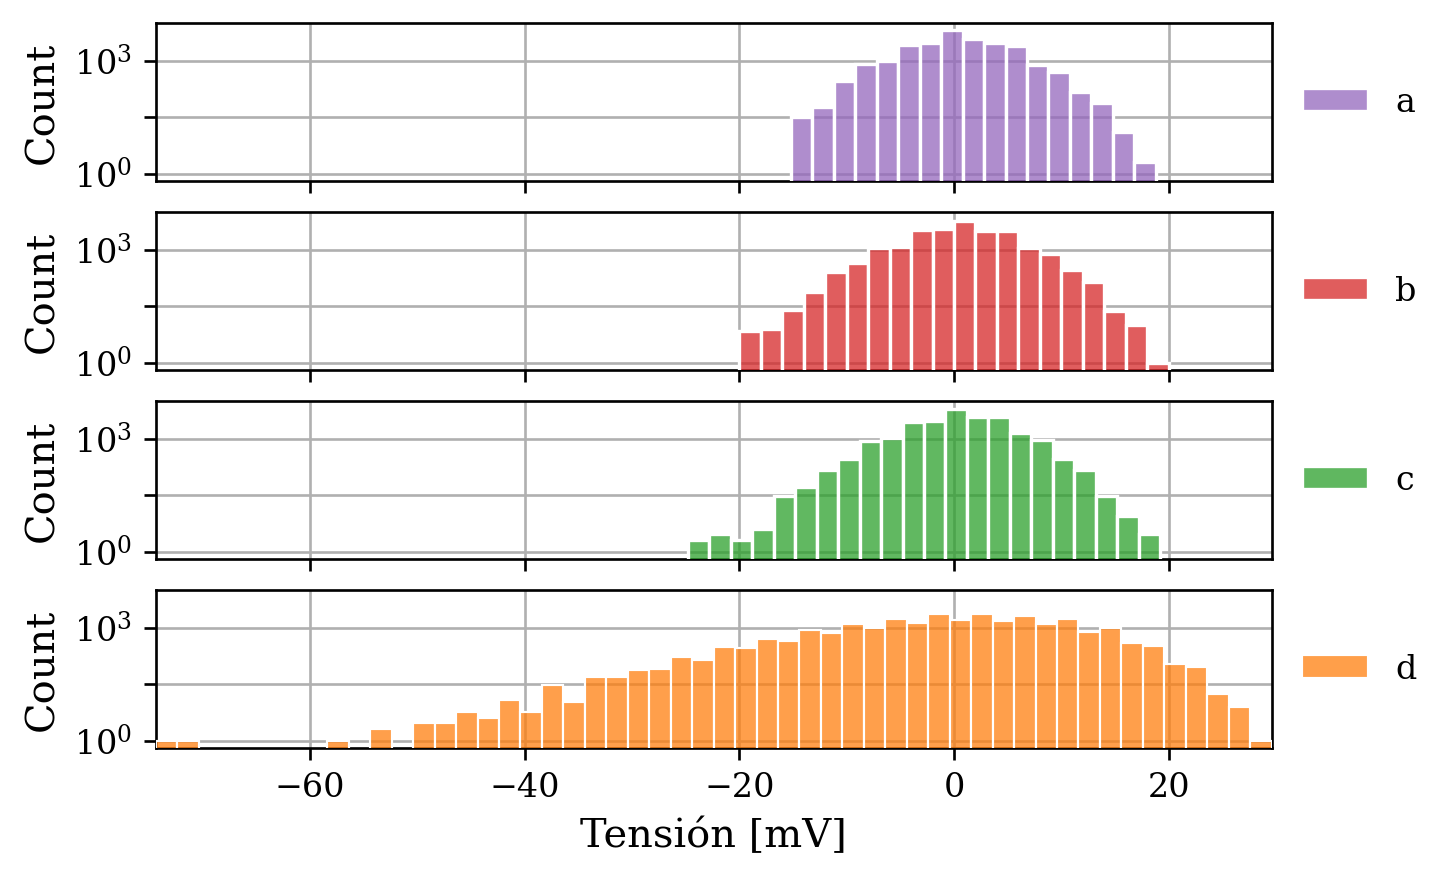

In [16]:
# ruido_df = pd.DataFrame(columns=["tiempo [s]", "channel 1 [V]", "config code"])

fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
j = 0
for config, t_fuente, ax in zip(config_code_dict.keys(), [0, 990, 990, 990], axs):
    tiempo = np.zeros(10*2500)
    channel1 = np.zeros_like(tiempo)
    for i in range(10):
        tiempo[i*2500:(i+1)*2500], channel1[i*2500:(i+1)*2500] = np.load(f"osci_max/ruido_{config}{t_fuente}{i}.npy")  # s, V
    sns.histplot(x=channel1*1e3, color=f"C{4-j}", binwidth=2, zorder=10, edgecolor="w",
                 #element="step", fill=False,
                 alpha=0.75,
                 label=config, ax=ax)
    j += 1
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_yscale("log")
ax.set_yticks([1e0, 10**1.5, 1e3])
ax.set_xlabel("Tensión [mV]")
plt.show()